# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import ImageGrid
plt.style.use('./rose-pine.mplstyle')

import numpy as np
from utils import get_dataset

In [2]:
dataset = get_dataset("./data/processed/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['./data/processed/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/processed/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 100
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


In [3]:
dataset.shuffle(buffer_size=100)
for sample in dataset.take(1):
    print(sample.keys())
    print(sample["image"].numpy().shape)
    print(sample["groundtruth_classes"].numpy().shape)
    print(sample["groundtruth_boxes"].numpy().shape)
    print(sample["groundtruth_classes"][0].numpy()) #LABEL
    print(sample["groundtruth_boxes"][0,:].numpy()) #BBOX

dict_keys(['image', 'source_id', 'key', 'filename', 'groundtruth_image_confidences', 'groundtruth_verified_neg_classes', 'groundtruth_not_exhaustive_classes', 'groundtruth_boxes', 'groundtruth_area', 'groundtruth_is_crowd', 'groundtruth_difficult', 'groundtruth_group_of', 'groundtruth_weights', 'groundtruth_classes', 'groundtruth_image_classes', 'original_image_spatial_shape'])
(640, 640, 3)
(6,)
(6, 4)
1
[0.5716383  0.96416163 0.7083183  1.        ]


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [4]:
def display_instances(ax, batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    
    # color mapping of classes
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] 
    colormap = {1: colors[0], 2: colors[1], 4: colors[2]}
    
    #fig, ax = plt.subplots() 
    img = batch["image"].numpy()
    ax.imshow(img)
    
    bboxes = batch['groundtruth_boxes'].numpy()
    classes = batch['groundtruth_classes'].numpy()
    
    for cl, bb in zip(classes, bboxes):
        y1 = int(bb[0]*img.shape[0])
        x1 = int(bb[1]*img.shape[1])
        y2 = int(bb[2]*img.shape[0])
        x2 = int(bb[3]*img.shape[1])
        rec = patches.Rectangle((x1, y1), x2- x1, y2-y1, facecolor='none', 
                        edgecolor=colormap[cl])
        ax.add_patch(rec)
    ax.axis("off")

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

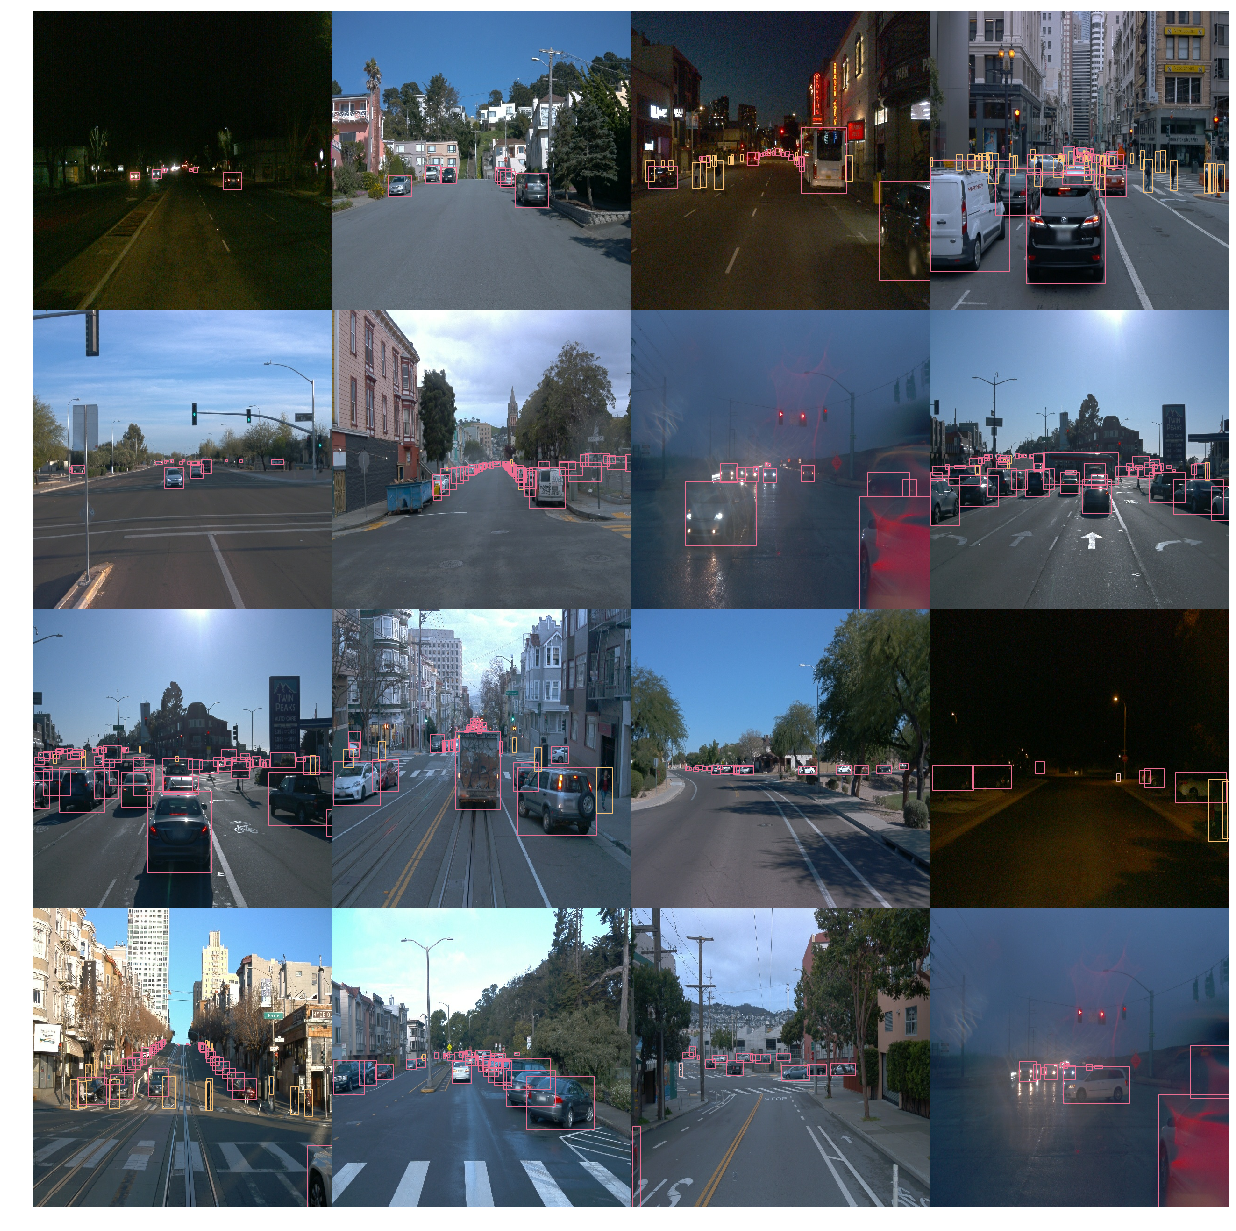

In [5]:
%matplotlib inline

fig = plt.figure(figsize=(22, 22))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.0,  # pad between axes in inch.
                 )
for ax, batch in zip(grid, dataset.shuffle(100).take(16)):
    display_instances(ax, batch)
plt.show()

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [6]:
objects = {1: 0, 2 : 0, 4: 0 }
for batches in dataset.take(100):
        for l in batches["groundtruth_classes"].numpy():
            objects[l] += 1

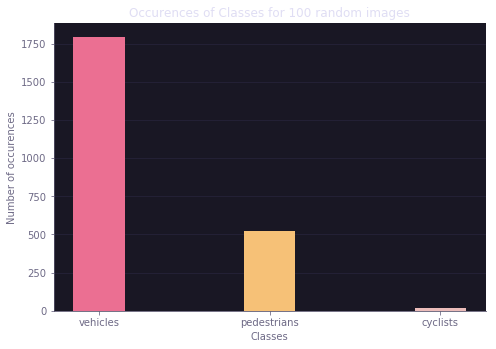

In [7]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set(xlabel='Classes', ylabel='Number of occurences', title='Occurences of Classes for 100 random images')
ax.bar(['vehicles'], [objects[1]], width = 0.3)
ax.bar(['pedestrians'], [objects[2]], width = 0.3)
ax.bar(['cyclists'], [objects[4]], width = 0.3)
plt.show()

In [8]:
num_objects = []

for batch in dataset.take(100):
    num_objects.append(len(batch['groundtruth_classes'].numpy()))

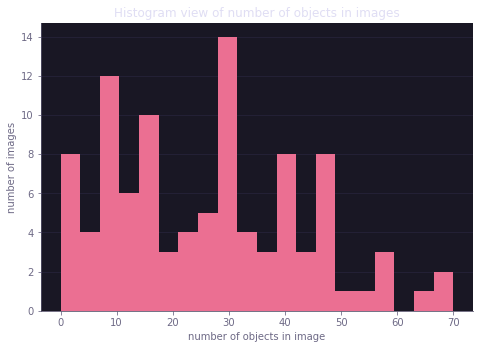

In [9]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set(xlabel='number of objects in image', ylabel='number of images', title='Histogram view of number of objects in images')
plt.hist(num_objects, bins=20, histtype="barstacked")
plt.show() 